In [1]:
import pandas as pd
import scanpy as sc 
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import rcParams
import os,re


In [2]:
plt.style.use('default')
plt.rcParams['figure.figsize'] = [4, 4]
plt.rcParams['figure.dpi'] = 300

In [3]:
adata1=sc.read_h5ad('/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/Scanpy_merge_rmdoubulet_UMAP_label_lastCell.h5ad')

In [4]:
# adata1.obs["Last_cell_type"].value_counts()

In [5]:
subB=adata1[adata1.obs["Last_cell_type"].isin(['CXCR5- Naïve B','CXCR5+ Naïve B'])]

In [6]:
subB.uns['log1p']['base']=None

In [7]:
subNnegB=adata1[adata1.obs["Last_cell_type"].isin(['CXCR5- Naïve B'])]

In [8]:
subB.obs.New_Body.value_counts()

PBMC      21063
Spleen     9698
Liver      4181
Thymus      239
Name: New_Body, dtype: int64

In [9]:
sc.tl.rank_genes_groups(subB, groupby='New_Body', method='wilcoxon')

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


In [10]:
mkdir -p /home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure2/S9/

In [11]:
# subB2=subB[~subB.obs.New_Body.isin(["Thymus"])]
subB2=subB

In [12]:
%run  /home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/util.py

In [13]:
cell_type_input = ['CXCR5+ Naïve B']
output_path = "/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure2/S9/S9CXCR5plus.pdf"
CXCR5plusorgan=SubBheatmap(adata1, cell_type_input, output_path)

/data5/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/util.py:36: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sub_adata.obs['New_Body'] = sub_adata.obs['New_Body'].astype('str')


/data5/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/util.py:36: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sub_adata.obs['New_Body'] = sub_adata.obs['New_Body'].astype('str')


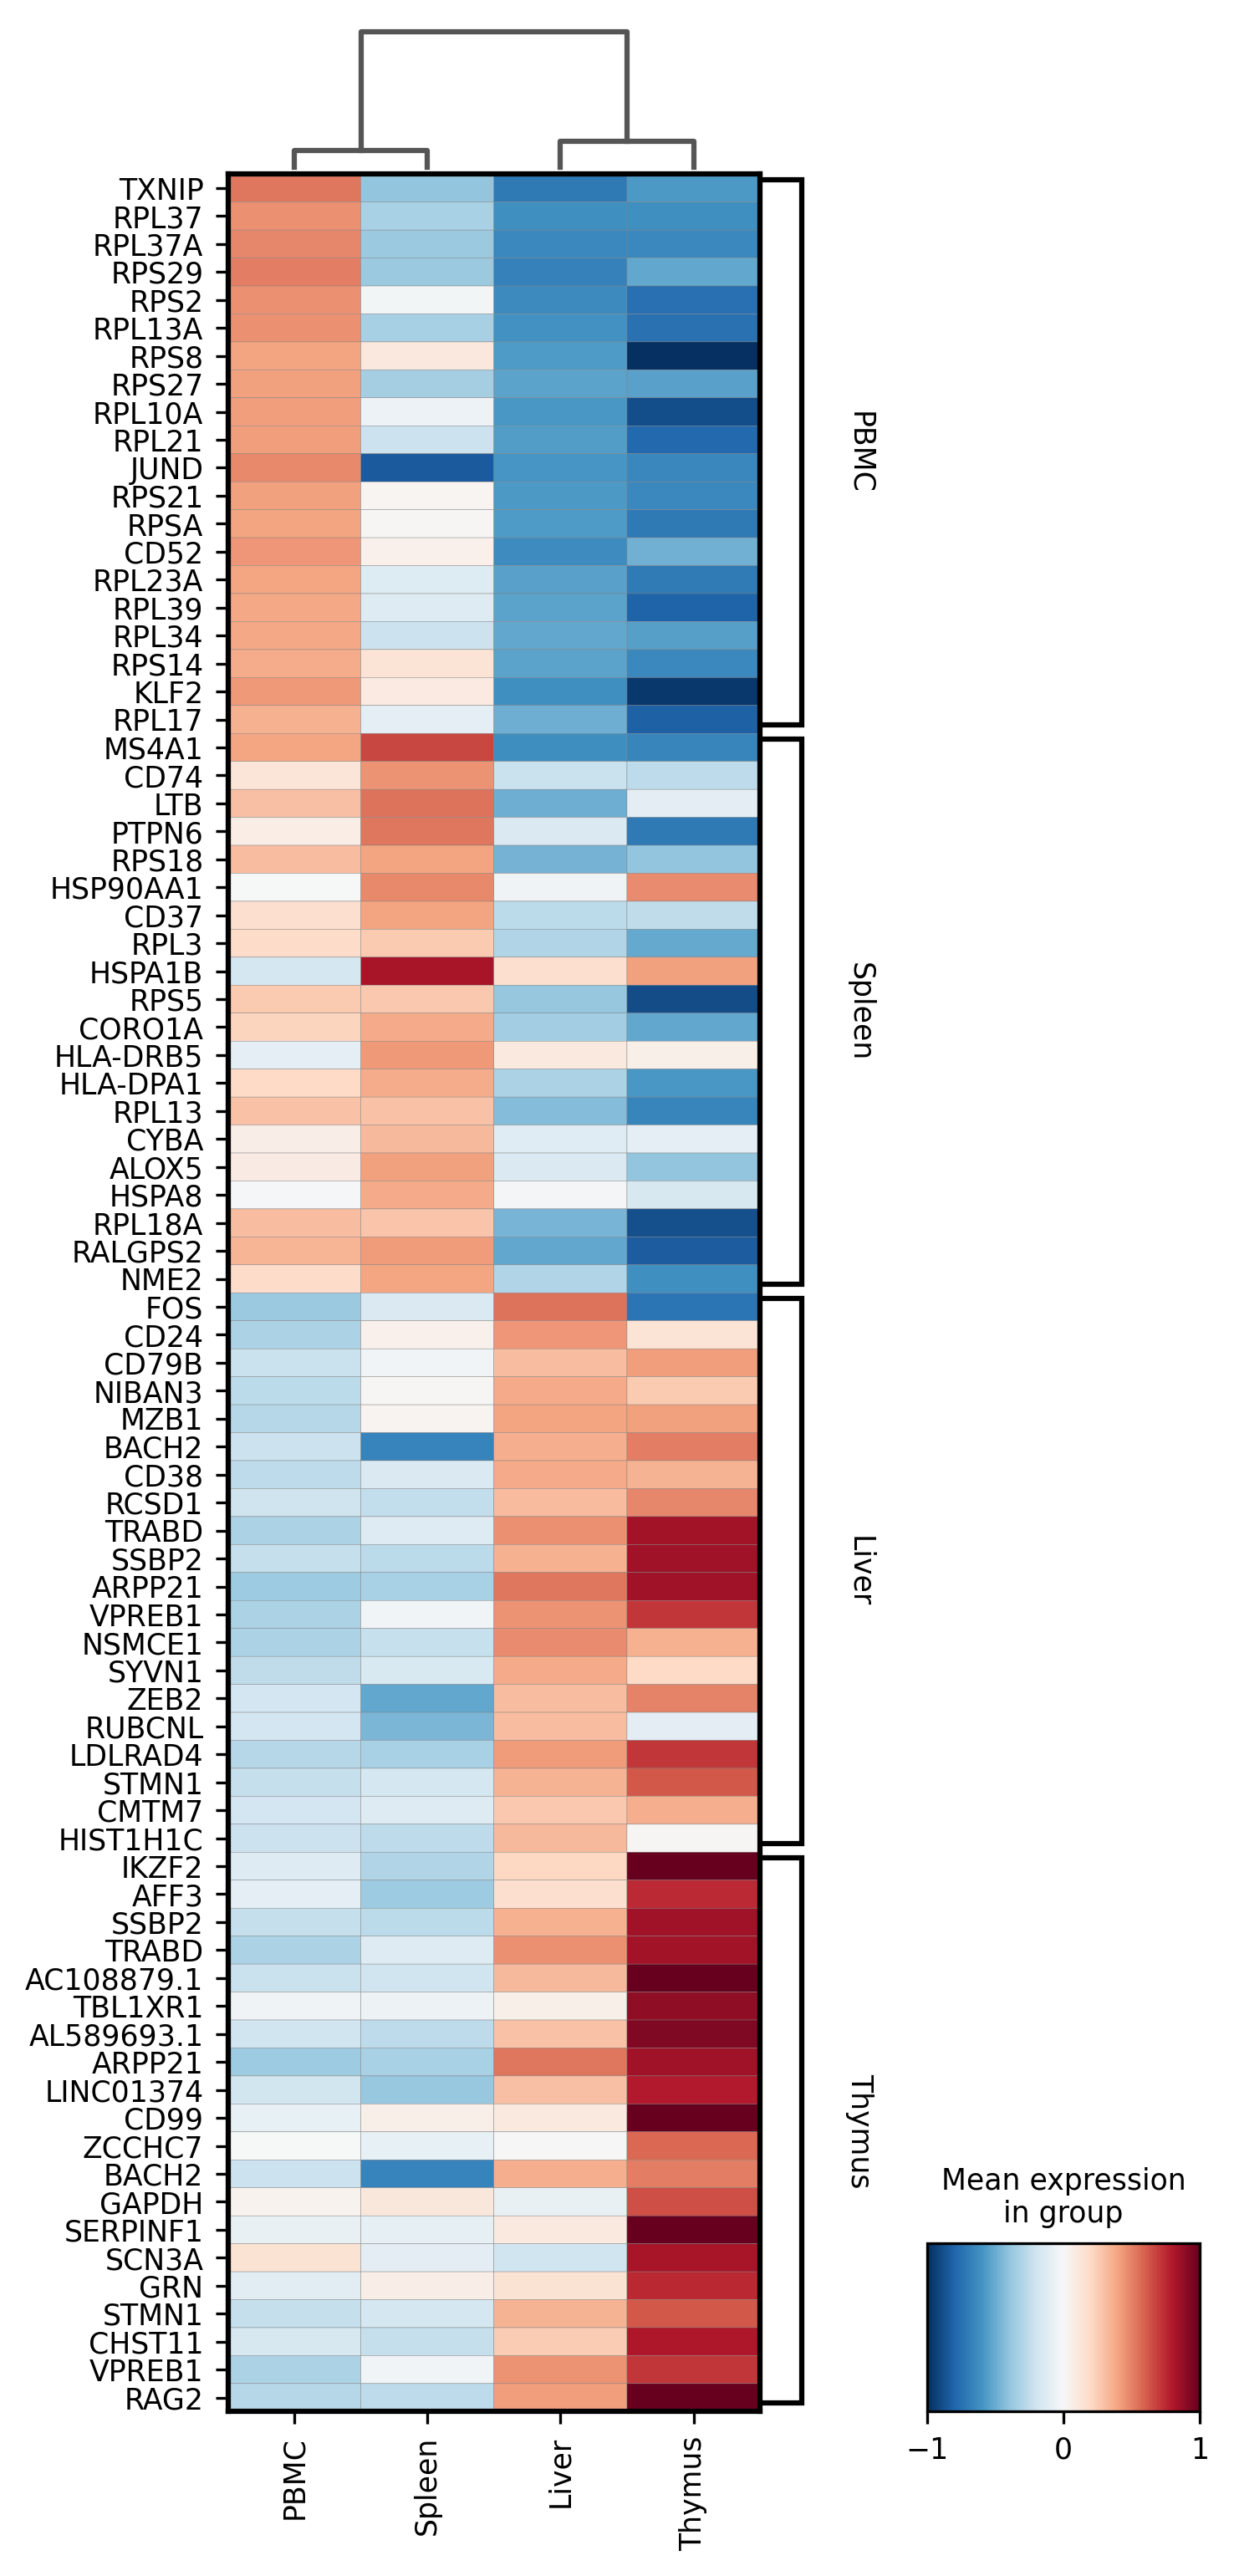

In [14]:
cell_type_input = ['CXCR5- Naïve B']
output_path2 = "/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure2/S9/S9CXCR5neg.pdf"
CXCR5negorgan=SubBheatmap(adata1, cell_type_input, output_path2)

/data5/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/util.py:36: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  sub_adata.obs['New_Body'] = sub_adata.obs['New_Body'].astype('str')


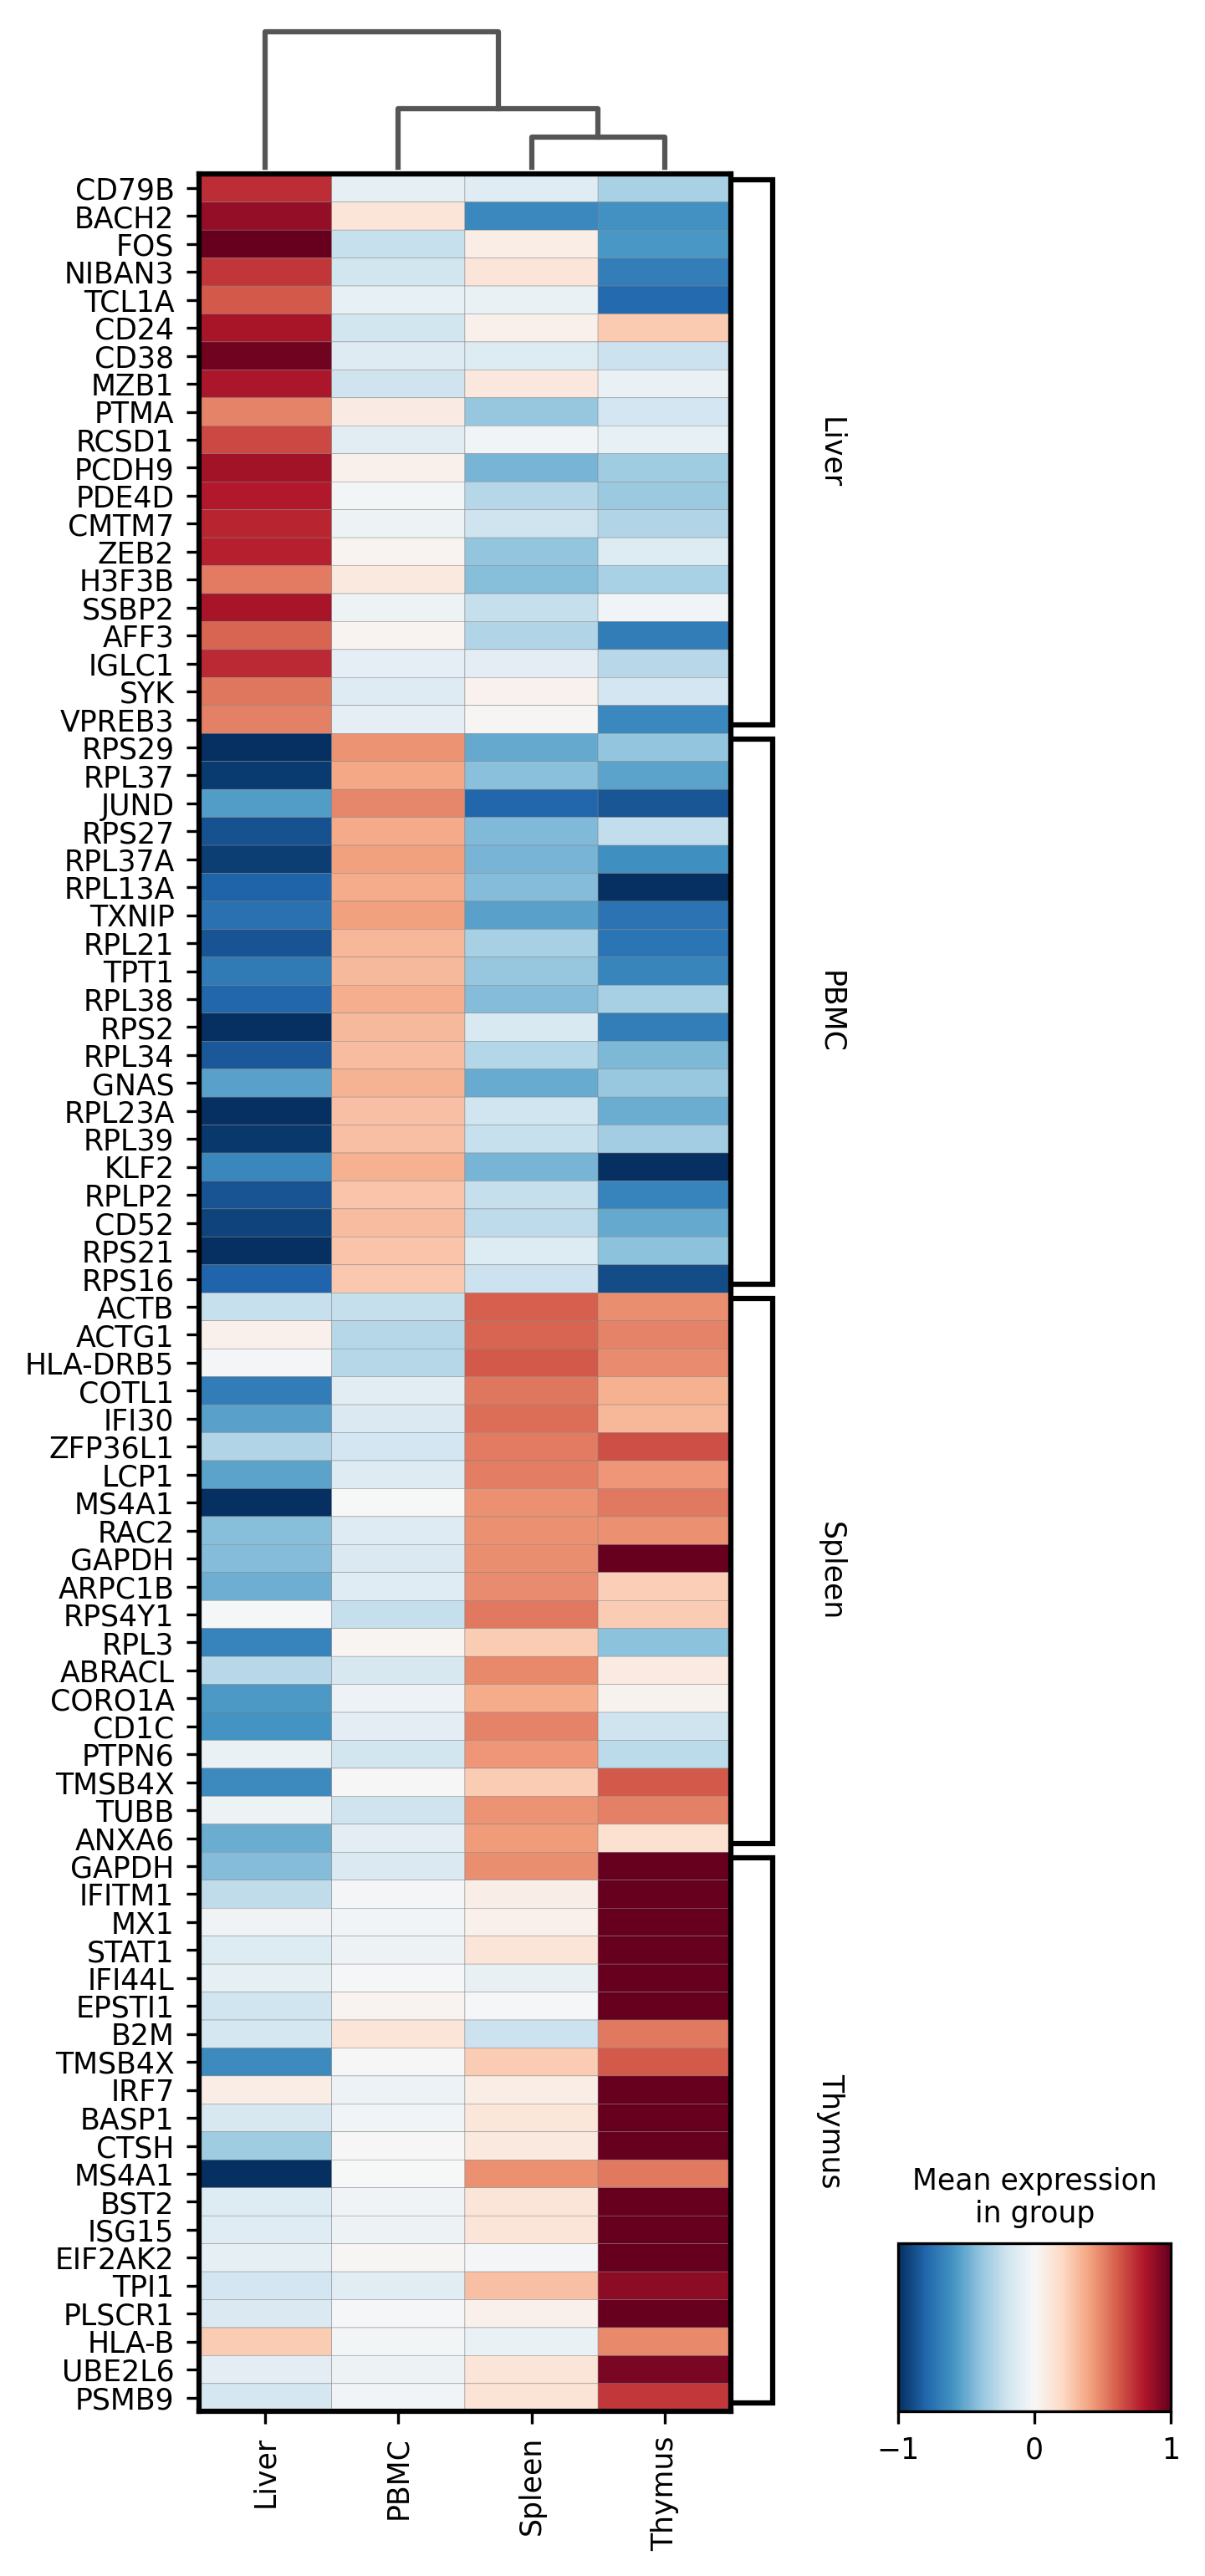

In [15]:
cell_type_input = ['CXCR5- Naïve B','CXCR5+ Naïve B']
output_path2 = "/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure2/S9/S9all.pdf"
Borgan=SubBheatmap(adata1, cell_type_input, output_path2)

In [16]:
subB2=adata1[adata1.obs["Last_cell_type"].isin(['CXCR5+ Naïve B'])]
subB2.obs.New_Body=subB2.obs.New_Body.astype('str')
sc.tl.rank_genes_groups(subB2, groupby='New_Body', method='wilcoxon')
subB2.layers['scaled'] = sc.pp.scale(subB2, copy=True).X
sc.tl.dendrogram(subB2, groupby='New_Body')

/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/pandas/core/generic.py:5931: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  self[name] = value


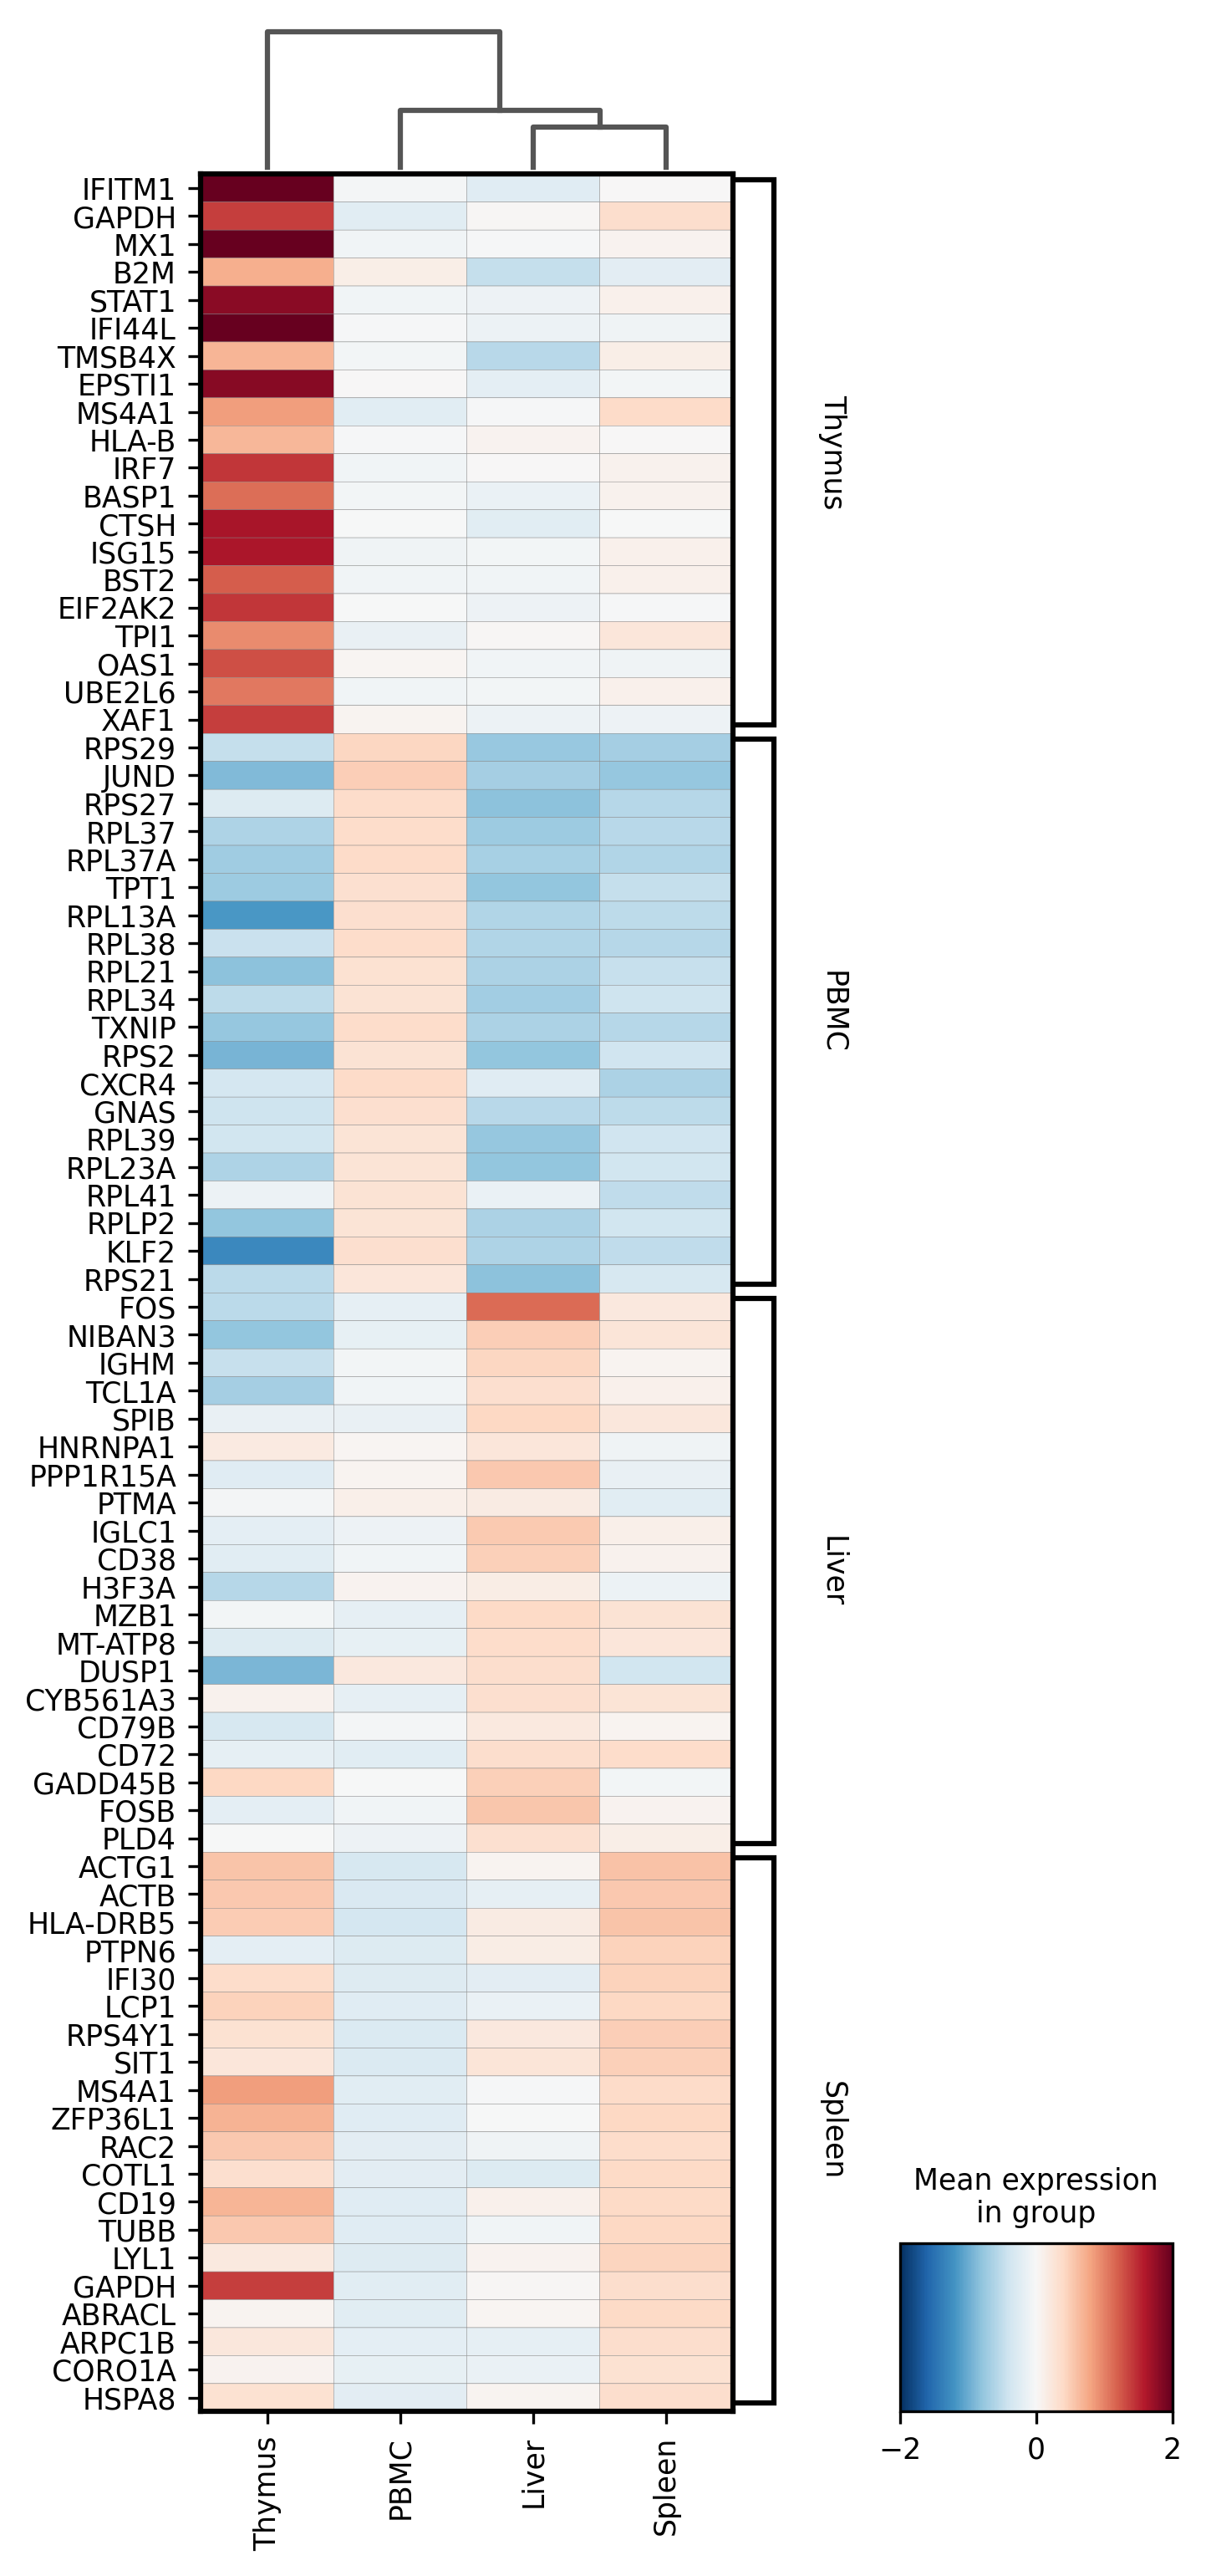

In [17]:
import matplotlib.pyplot as plt
plt.style.use('default')
# plt.rcParams['figure.figsize'] = [3, 2]
plt.rcParams['figure.dpi'] = 300
sc.pl.rank_genes_groups_matrixplot(subB2, n_genes=20, use_raw=False, vmin=-2, vmax=2, cmap='RdBu_r', layer='scaled',swap_axes=True,show=False, figsize=(5,12))
plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure2/S9/S9CXCR5.pdf",bbox_inches='tight')

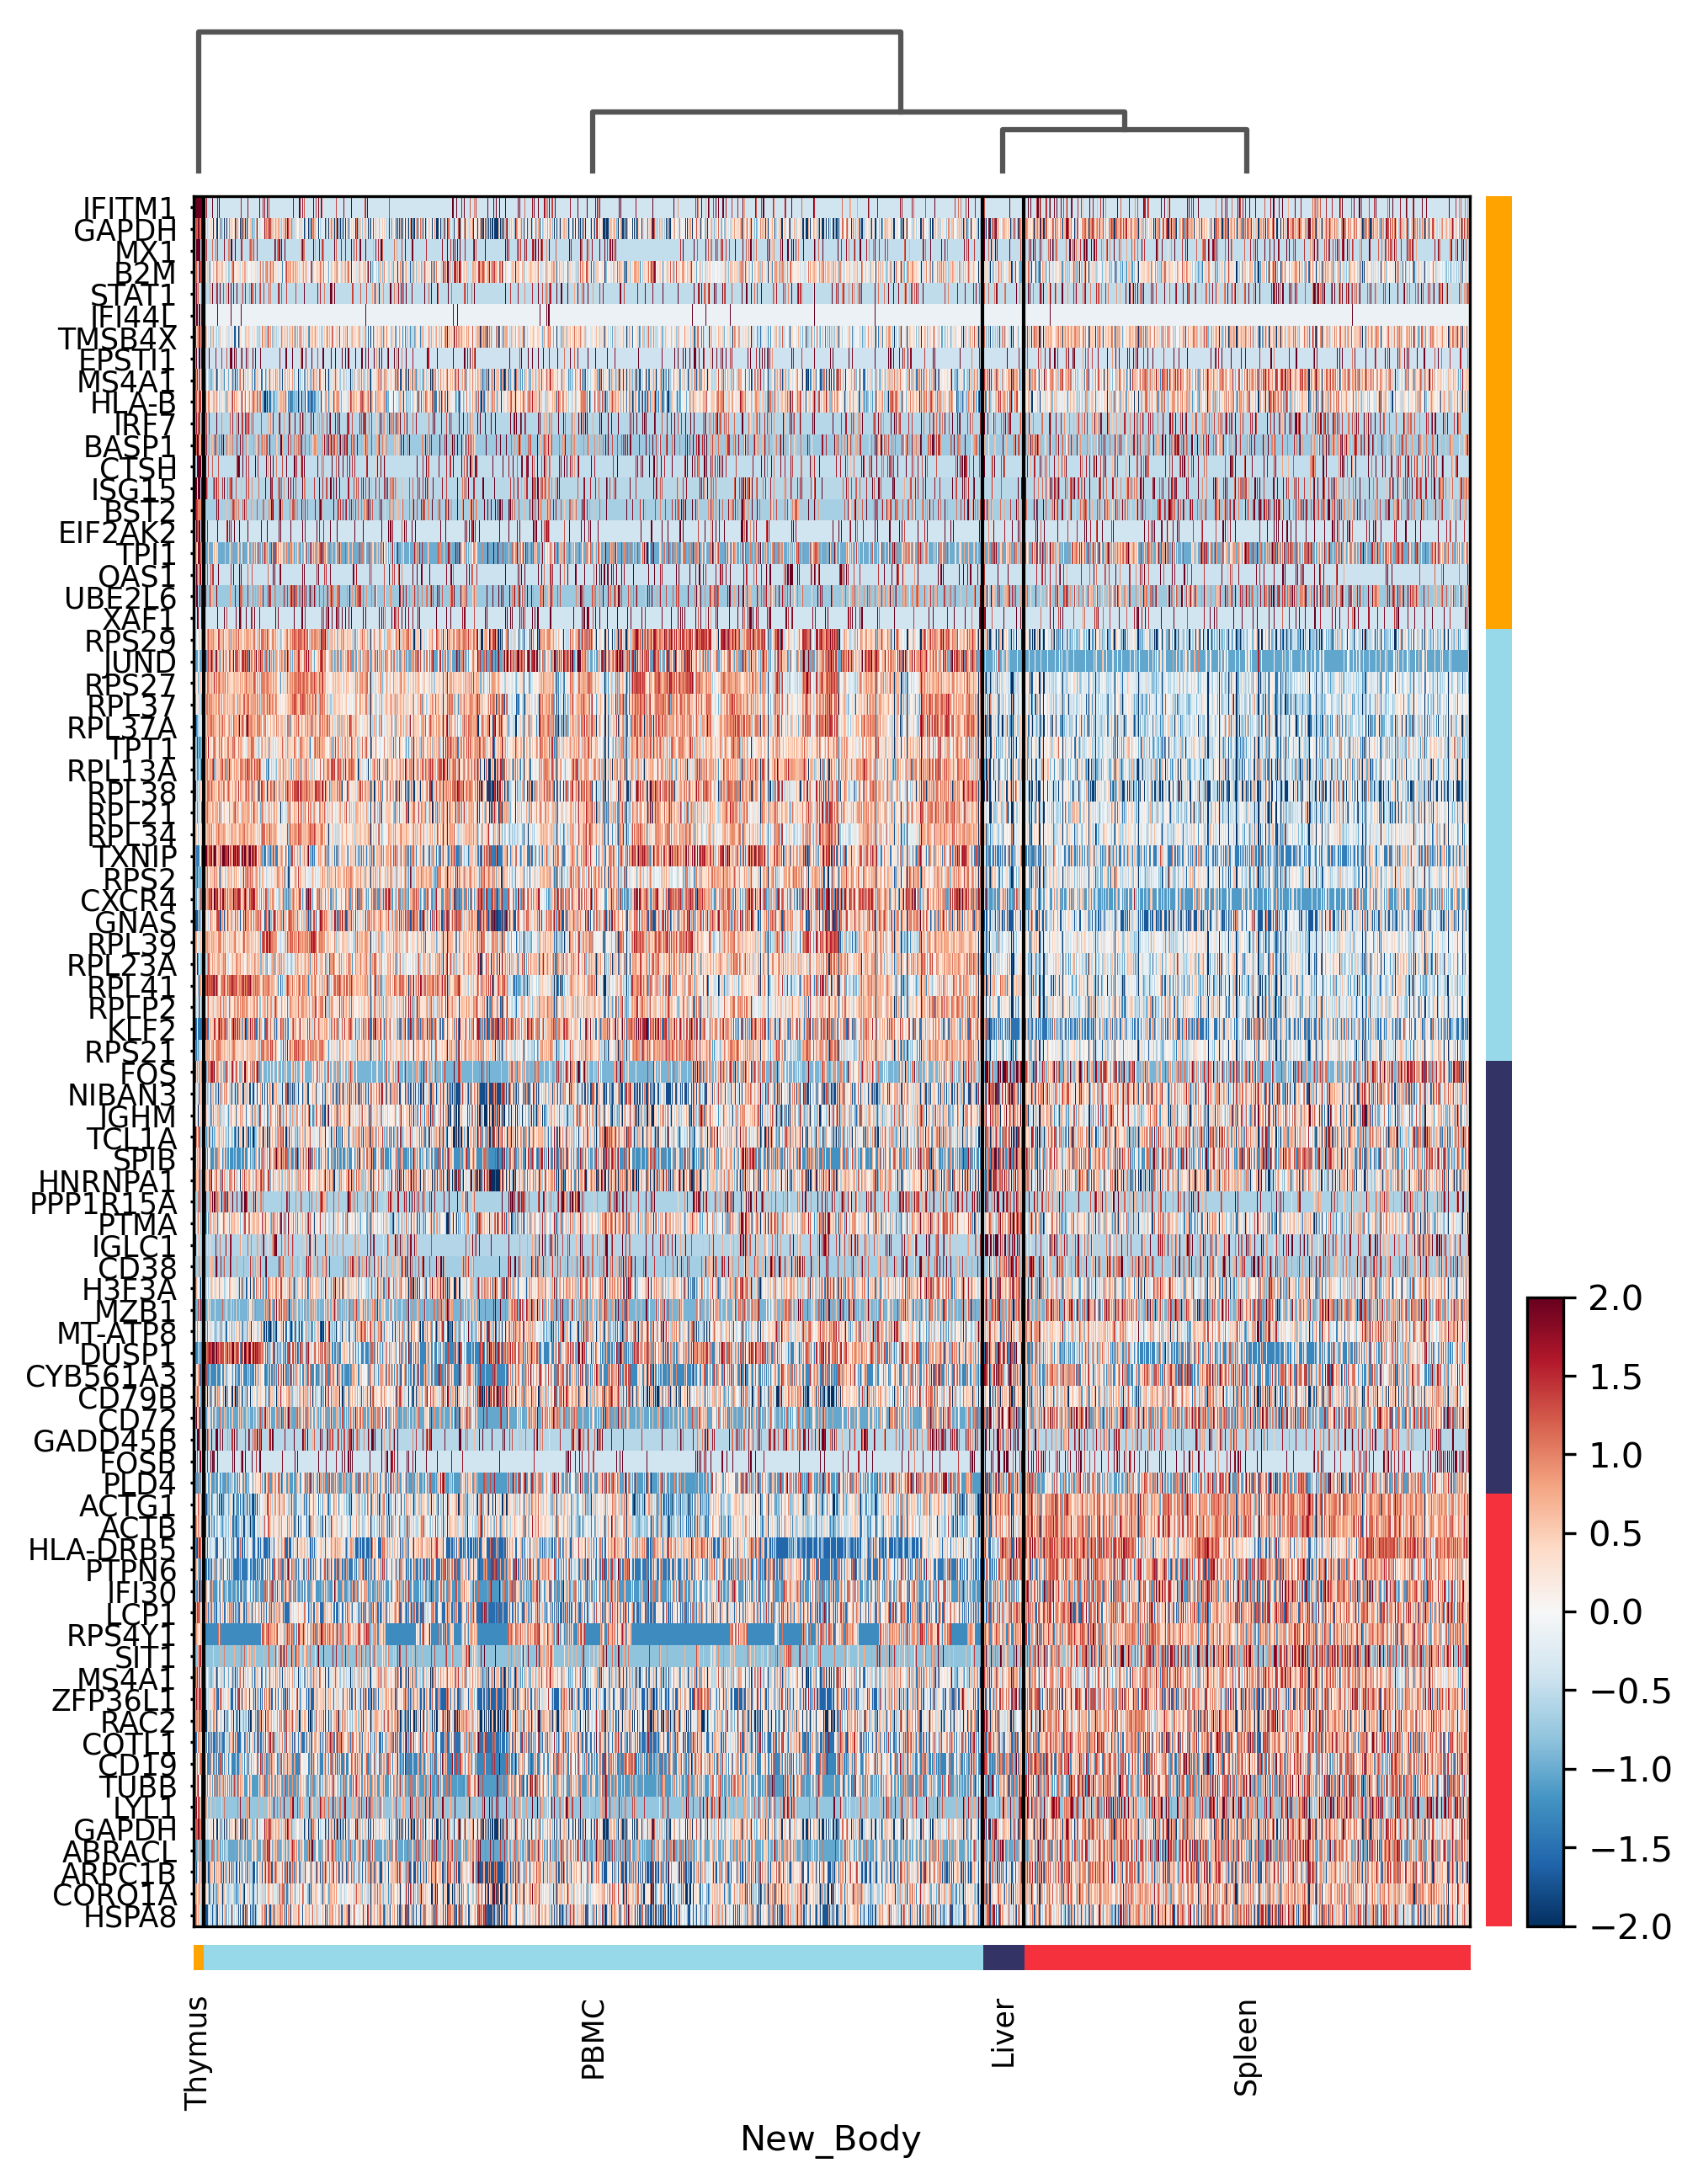

In [18]:
sc.pl.rank_genes_groups_heatmap(subB2,
                                show_gene_labels=True,
                                n_genes=20, use_raw=False,
                                swap_axes=True, vmin=-2, vmax=2, cmap='RdBu_r', layer='scaled', figsize=(7,10), show=False);

In [20]:
# sc.pl.rank_genes_groups_heatmap(subB,
#                                 show_gene_labels=True,
#                                 n_genes=20, use_raw=False,
#                                 swap_axes=True, vmin=-2, vmax=2, cmap='RdBu_r', layer='scaled', figsize=(7,10), show=False);

In [26]:
subB3=subB

In [27]:
subB3.obs.Last_cell_type.value_counts()

CXCR5+ Naïve B    26800
CXCR5- Naïve B     8381
Name: Last_cell_type, dtype: int64

In [48]:
organ=[]
k=0
for u in subB3.obs.New_Body.unique():
    print(u)
    
    organ[k]=sc.tl.rank_genes_groups(subB3[subB3.obs.New_Body.isin([u])], groupby='Last_cell_type', method='wilcoxon')
    k+=1
    

PBMC


/data1/maolp/mamba/envs/Pyscan/lib/python3.9/site-packages/anndata/compat/_overloaded_dict.py:106: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  self.data[key] = value


IndexError: list assignment index out of range

In [28]:
sc.tl.rank_genes_groups(subB3, groupby='Last_cell_type', method='wilcoxon')

In [ ]:
sc.tl.dendrogram(subB2, groupby='Last_cell_type')

In [29]:
subB3.layers['scaled'] = sc.pp.scale(subB3, copy=True).X

In [ ]:
# sc.pl.rank_genes_groups_heatmap(subB2,
#                                 show_gene_labels=True,
#                                 n_genes=200, use_raw=False,
#                                 swap_axes=True, vmin=-2, vmax=2, cmap='RdBu_r', layer='scaled', figsize=(7,50), show=False);

In [ ]:
# subB3.obs.New_Body=subB3.obs.New_Body.astype('str')

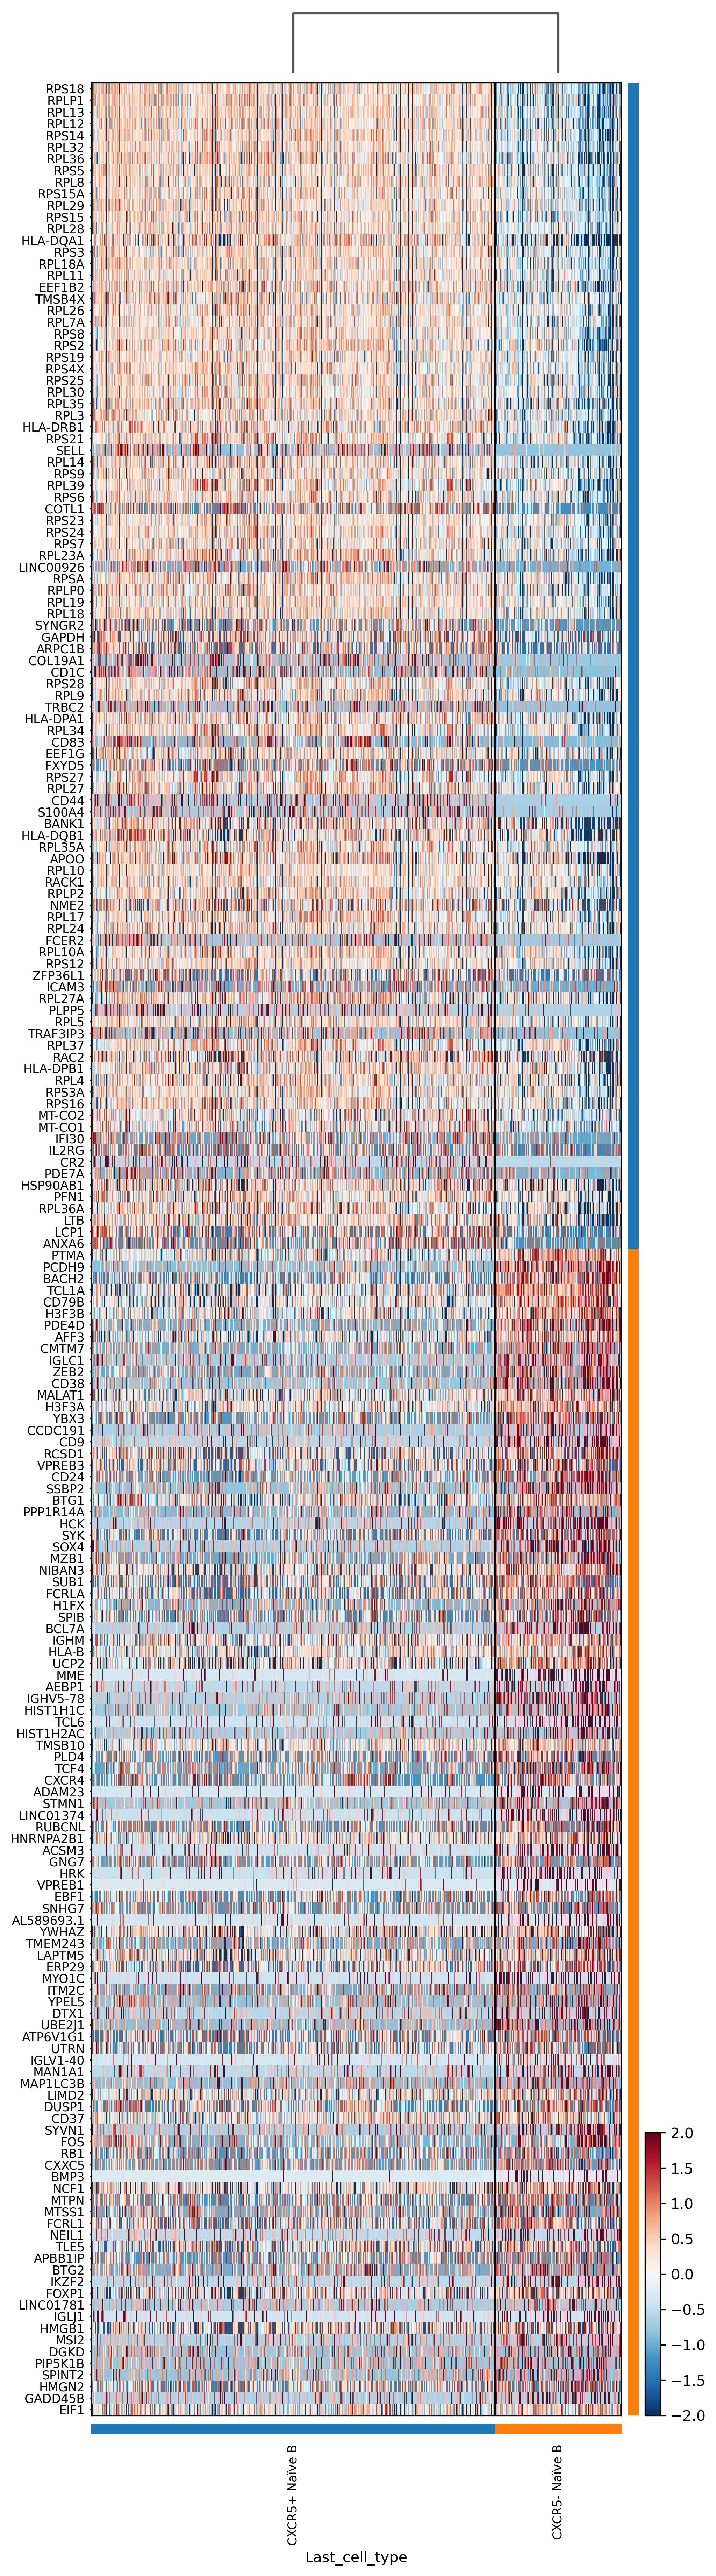

In [36]:
sc.pl.rank_genes_groups_heatmap(subB3,
                                show_gene_labels=True,
                                n_genes=100, use_raw=False,
                                swap_axes=True, vmin=-2, vmax=2, cmap='RdBu_r', layer='scaled', figsize=(7,30), show=False);

In [49]:
subB3

AnnData object with n_obs × n_vars = 35181 × 31424
    obs: 'Name', 'doublet_scores', 'predicted_doublets', 'predicted_labels', 'over_clustering', 'majority_voting', 'conf_score', 'Cellname', 'AdjustedID', 'New_Body', 'Week', 'TCRBCRlabel', 'n_genes', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'leiden', 'Last_cell_type', 'Cell_lineage', 'Last_cell_type2', 'Last_cell_type_num', 'Last_cell_type_num2'
    var: 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts'
    uns: 'AdjustedID_colors', 'Cell_lineage_colors', 'Last_cell_type_num_colors', 'New_Body_colors', 'TCRBCRlabel_colors', 'hvg', 'leiden', 'leiden_colors', 'log1p', 'majority_voting_colors', 'neighbors', 'pca', 'umap', 'rank_genes_groups', 'Last_cell_type_colors', 'dendrogram_Last_cell_type'
    obsm: 'X_pca', 'X_umap'
    layers: 'scaled'
    obsp: 'connectivities', 'distances'

In [71]:
help(sc.pl.rank_genes_groups_matrixplot)

Help on function rank_genes_groups_matrixplot in module scanpy.plotting._tools:

rank_genes_groups_matrixplot(adata: anndata._core.anndata.AnnData, groups: Union[str, Sequence[str]] = None, n_genes: Optional[int] = None, groupby: Optional[str] = None, values_to_plot: Optional[Literal['scores', 'logfoldchanges', 'pvals', 'pvals_adj', 'log10_pvals', 'log10_pvals_adj']] = None, var_names: Union[Sequence[str], Mapping[str, Sequence[str]], NoneType] = None, gene_symbols: Optional[str] = None, min_logfoldchange: Optional[float] = None, key: Optional[str] = None, show: Optional[bool] = None, save: Optional[bool] = None, return_fig: Optional[bool] = False, **kwds)
    Plot ranking of genes using matrixplot plot (see :func:`~scanpy.pl.matrixplot`)
    
    Parameters
    ----------
    adata
        Annotated data matrix.
    groups
        The groups for which to show the gene ranking.
    n_genes
        Number of genes to show. This can be a negative number to show for
        example the do

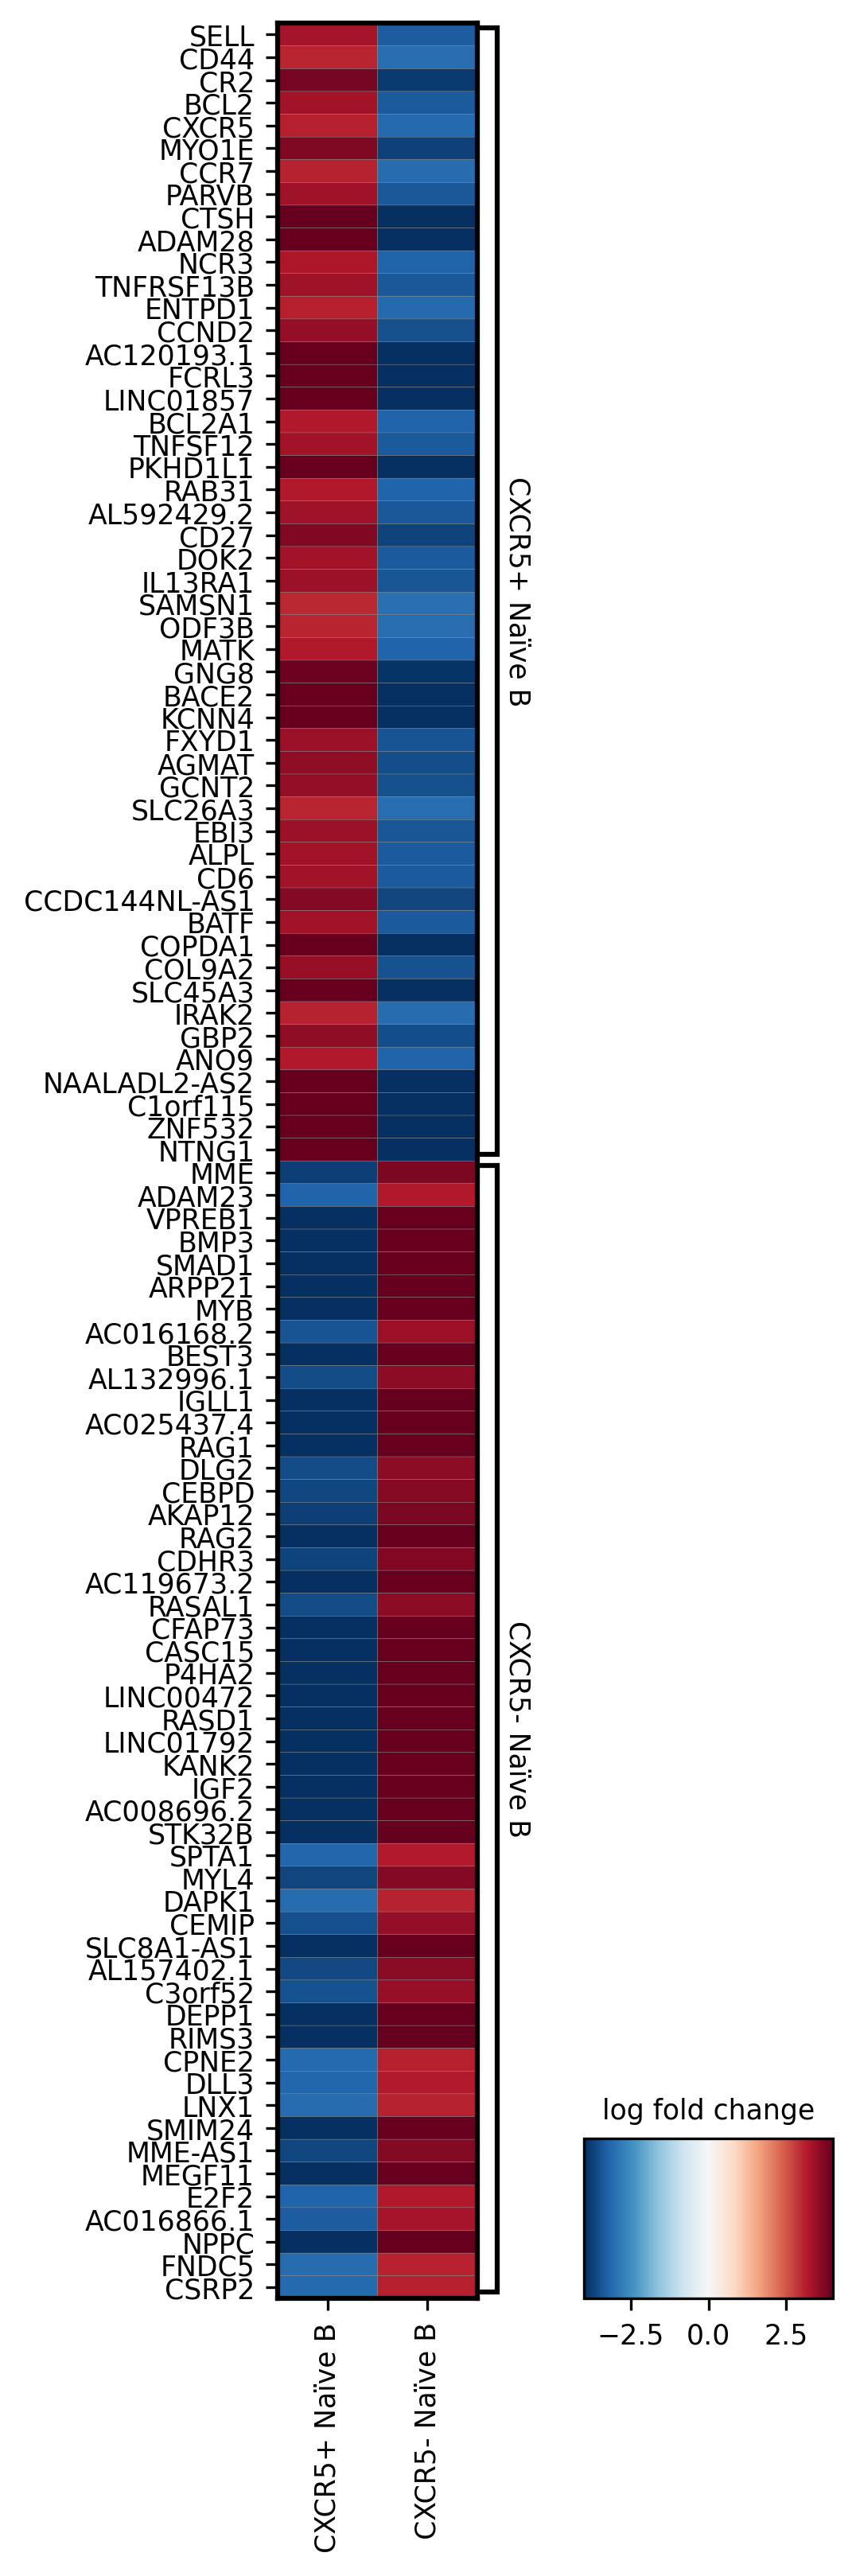

In [94]:
import matplotlib.pyplot as plt
plt.style.use('default')
# plt.rcParams['figure.figsize'] = [3, 2]
plt.rcParams['figure.dpi'] = 300
sc.pl.rank_genes_groups_matrixplot(subB3,values_to_plot="logfoldchanges", n_genes=50, use_raw=False,min_logfoldchange=3, vmin=-4, vmax=4, cmap='RdBu_r', layer='scaled',swap_axes=True,show=False, figsize=(3,12))
plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure2/S9/SubB.pdf",bbox_inches='tight')

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('default')
# plt.rcParams['figure.figsize'] = [3, 2]
plt.rcParams['figure.dpi'] = 300
sc.pl.rank_genes_groups_matrixplot(subB3, n_genes=200, use_raw=False, vmin=-2, vmax=2, cmap='RdBu_r', layer='scaled',swap_axes=True,show=False, figsize=(3,50))
plt.savefig("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure2/S9/SubB.pdf",bbox_inches='tight')

In [62]:
mkdir -p /home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Bdata

In [102]:
df4= sc.get.rank_genes_groups_df(subB3, group=None)
filtered_df4=df4[(df4['logfoldchanges'] > 3) & (df4['pvals_adj'] < 0.05)]
filtered_df4=filtered_df4.head(100)
filtered_df4.to_csv("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Bdata/Bdfall.csv")

In [ ]:
# df5[(df4['logfoldchanges'] > 3) & (df4['pvals_adj'] < 0.05)]

In [100]:
# df1= sc.get.rank_genes_groups_df(subB3, group="CXCR5+ Naïve B")
# filtered_df1 = df1[(df1['logfoldchanges'] > 3) & (df1['pvals_adj'] < 0.05)]


# print(filtered_df1.head(50))  
# # print(df1[1:20])
# filtered_df1.to_csv("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Bdata/Bdf1.csv")
# filtered_df1.shape

          names     scores  logfoldchanges          pvals      pvals_adj
36          MME  43.416603        3.764880   0.000000e+00   0.000000e+00
46       ADAM23  39.088520        3.205028   0.000000e+00   0.000000e+00
54       VPREB1  37.558395        4.567294  1.027608e-308  2.018221e-306
79         BMP3  30.215225        4.516567  1.494610e-200  2.087406e-198
129       SMAD1  22.300528        5.607402  3.651696e-110  3.187525e-108
152      ARPP21  20.072592        4.317891   1.281460e-89   9.497309e-88
170         MYB  19.099503        4.279000   2.549071e-81   1.733810e-79
178  AC016168.2  18.497021        3.462501   2.182051e-76   1.407983e-74
197       BEST3  17.075981        6.579238   2.240272e-65   1.315856e-63
209  AL132996.1  16.220612        3.578705   3.605911e-59   1.967225e-57
245       IGLL1  14.432907        7.345724   3.212493e-47   1.465158e-45
264  AC025437.4  13.396432        4.986018   6.344077e-41   2.602562e-39
274        RAG1  13.127662        6.300381   2.2860

(62, 5)

In [70]:
df2 = sc.get.rank_genes_groups_df(subB3, group="CXCR5+ Naïve B")

print(df2[1:20])
df2.to_csv("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Bdata/Bdf2.csv")

       names     scores  logfoldchanges  pvals  pvals_adj
1      RPLP1  89.555885        1.014368    0.0        0.0
2      RPL13  88.725510        0.854206    0.0        0.0
3      RPL12  86.822060        1.049908    0.0        0.0
4      RPS14  84.345978        1.025827    0.0        0.0
5      RPL32  80.363426        0.746872    0.0        0.0
6      RPL36  77.205414        1.125343    0.0        0.0
7       RPS5  76.787369        0.904346    0.0        0.0
8       RPL8  73.871712        0.780674    0.0        0.0
9     RPS15A  73.313759        0.669024    0.0        0.0
10     RPL29  73.165489        0.718336    0.0        0.0
11     RPS15  72.613152        0.745439    0.0        0.0
12     RPL28  72.264053        0.596752    0.0        0.0
13  HLA-DQA1  71.367676        1.607793    0.0        0.0
14      RPS3  70.593208        0.679639    0.0        0.0
15    RPL18A  70.421242        0.712657    0.0        0.0
16     RPL11  70.320580        0.606345    0.0        0.0
17    EEF1B2  

In [ ]:
%load_ext rpy2.ipython

In [ ]:
subB.obs.to_csv("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/subB.csv")

In [ ]:
mkdir -p /home/maolp/Allcount/All_scanpyData/Bcell

In [ ]:
# df3 = sc.get.rank_genes_groups_df(Borgan, group=None)
# subB.obs.to_csv("/home/maolp/data5/Gaofeng_All_matrix/Allcount/All_scanpyData/Data/subB.csv")
# df3[df3.group=="Liver"].to_csv("/home/maolp/Allcount/All_scanpyData/Bcell/Liver.csv")
# df3[df3.group=="Spleen"].to_csv("/home/maolp/Allcount/All_scanpyData/Bcell/Spleen.csv")
# df3[df3.group=="PBMC"].to_csv("/home/maolp/Allcount/All_scanpyData/Bcell/PBMC.csv")
# df3[df3.group=="Thymus"].to_csv("/home/maolp/Allcount/All_scanpyData/Bcell/Thymus.csv")
# LiverB=df3[df3.group=="Liver"]
# SpleenB=df3[df3.group=="Spleen"]
# PBMCB=df3[df3.group=="PBMC"]
# TB=df3[df3.group=="Thymus"]

In [ ]:
# import scanpy as sc

# def save_ranked_genes_groups(borgan, path_prefix, file_prefix):
#     df_ranked_genes = sc.get.rank_genes_groups_df(borgan, group=None)
#     borgan.obs.to_csv(f"{path_prefix}/{file_prefix}_subB.csv")
    
#     dataframes = []
    
#     for group in ["Liver", "Spleen", "PBMC", "Thymus"]:
#         df_group = df_ranked_genes[df_ranked_genes.group == group]
#         df_group.to_csv(f"{path_prefix}/{file_prefix}_{group}.csv")
#         dataframes.append(df_group)
    
#     return dataframes

In [ ]:
path_prefix = "/home/maolp/Allcount/All_scanpyData/Bcell"
file_prefix = "Bcell"
Borgan_list = save_ranked_genes_groups(Borgan, path_prefix, file_prefix)

In [ ]:
Borgan_list[0]

In [ ]:
LiverB=Borgan_list[0]
SpleenB=Borgan_list[1]
PBMCB=Borgan_list[2]
ThymusB=Borgan_list[3]

In [ ]:
%%R -i LiverB -i PBMCB -i SpleenB -i ThymusB
LiverB2=subset(LiverB,logfoldchanges>1 &pvals_adj<0.05 &scores >6)
SpleenB2=subset(SpleenB,logfoldchanges>1 &pvals_adj<0.05 &scores >6)
PBMCB2=subset(PBMCB,logfoldchanges>1 &pvals_adj<0.05 &scores >6)
ThymusB2=subset(ThymusB,logfoldchanges>1 &pvals_adj<0.05 &scores >6)
# dim(LiverB2)
# dim(PBMCB2)
# dim(SpleenB2)
# head(LiverB2)


In [ ]:
%%R
# dim(LiverB2)
# dim(PBMCB2)
# dim(SpleenB2)
# head(SpleenB2)
dim(ThymusB2)

In [ ]:
%%R -i LiverB
# LiverB=subset(LiverB,logFC>0 &pvals_adj<0.05 &scores >2)

source("/home/maolp/Main_Gao_ScanpyProject20231130/HFB_script_in_save/util.R")

In [ ]:
%%R
LiverB3=perform_enrichment_analysis(LiverB2)
SpleenB3=perform_enrichment_analysis(SpleenB2)
PBMCB3=perform_enrichment_analysis(PBMCB2)
ThymusB3=perform_enrichment_analysis(ThymusB2)

In [ ]:
%%R
ThymusB3=perform_enrichment_analysis(ThymusB2)

In [ ]:
# pwd

In [ ]:
%%R -w 3000 -h 2000 -r 300
write.csv(SpleenB3$GO,"/home/maolp/Allcount/All_scanpyData/Bcell/SpleenB3_GO.csv")


In [ ]:
%%R -w 3000 -h 2000 -r 300
write.csv(PBMCB3$GO,"/home/maolp/Allcount/All_scanpyData/Bcell/PBMCB3_GO.csv")
dotplot(PBMCB3$GO)

In [ ]:
%%R
write.csv(ThymusB3$GO,"/home/maolp/Allcount/All_scanpyData/Bcell/ThymusB3_GO.csv")

In [ ]:
%%R
# dotplot(LiverB3$GO)
write.csv(LiverB3$GO,"/home/maolp/Allcount/All_scanpyData/Bcell/LiverB3_GO.csv")
# dotplot((LiverB3$GO)

In [ ]:
%%R
dotplot(ThymusB3$GO)

In [ ]:
mkdir /home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure2/S9/GO

In [ ]:
cp -r /home/maolp/Allcount/All_scanpyData/Bcell/*GO.csv /home/maolp/Main_Gao_ScanpyProject20231130/HFB_Figure_Plot/Sup_Figure2/S9/GO

In [ ]:
# sc.pl.umap(subB,color=["CXCR5"])

In [ ]:
# sc.pl.heatmap(subB, list_of_strings, groupby='New_Body', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r', dendrogram=True, swap_axes=True, figsize=(11,4))

In [ ]:
# sc.pl.dotplot(subB, list_of_strings, groupby='New_Body', layer='scaled', vmin=-2, vmax=2, cmap='RdBu_r', dendrogram=True, swap_axes=True, figsize=(11,4))

In [ ]:
# %%R -i subadjGZMB
# subadjNKup=subset(subadjNK,logFC>0)
# library(clusterProfiler)
# library(org.Hs.eg.db)
# library(fgsea)
# library(msigdbr)

# map_df <- bitr(subadjGZMB$names, fromType="SYMBOL", toType=c("ENTREZID"), OrgDb=org.Hs.eg.db)
# subadjGZMB_merged_df <- merge(subadjGZMB, map_df, by.x = "names", by.y = "SYMBOL")
# head(merged_df)
# dim(merged_df)
# subadjGZMB_enrichKKup <- enrichKEGG(gene =subadjGZMB_merged_df$ENTREZID, organism = "hsa", 
#                        keyType = "kegg",
#                        pvalueCutoff = 0.05,
#                        pAdjustMethod = "BH",
#                        minGSSize = 10, maxGSSize = 500, 
#                        qvalueCutoff = 0.05,
#                        use_internal_data = FALSE)

# subadjGZMB_erichDEgo_up<-enrichGO(subadjGZMB_merged_df$names, OrgDb = org.Hs.eg.db, ont='ALL',pAdjustMethod = 'BH',pvalueCutoff = 0.05, 
#                     qvalueCutoff = 0.05,keyType = 'SYMBOL')

In [ ]:
# sc.pl.umap(subB,color=['CXCR4'])

In [ ]:
# subNnegB.uns['log1p']['base']=None
# sc.tl.rank_genes_groups(subNnegB, groupby='New_Body', method='wilcoxon')
# subNnegB.layers['scaled'] = sc.pp.scale(subNnegB, copy=True).X

# sc.pl.rank_genes_groups_heatmap(subNnegB,show_gene_labels=True,n_genes=50, use_raw=False, swap_axes=True, vmin=-2, vmax=2, cmap='RdBu_r', layer='scaled', figsize=(7,20), show=False);

In [ ]:
# subNposB=adata1[adata1.obs["Last_cell_type"].isin(['CXCR5+ Naïve B])]
# subNposB.uns['log1p']['base']=None
# sc.tl.rank_genes_groups(subNposB, groupby='New_Body', method='wilcoxon')
# subNposB.layers['scaled'] = sc.pp.scale(subNposB, copy=True).X

# sc.pl.rank_genes_groups_heatmap(subNposB,show_gene_labels=True,n_genes=50, use_raw=False, swap_axes=True, vmin=-2, vmax=2, cmap='RdBu_r', layer='scaled', figsize=(7,20), show=False);

In [ ]:
# sc.pl.umap(adata1,color='leiden')

In [ ]:
# sc.pl.umap(adata1,color='New_Body')

In [ ]:
# sc.pl.umap(adata1,color='Last_cell_type')

In [ ]:
# sc.pl.(subNposB,show_gene_labels=True,n_genes=50, use_raw=False, swap_axes=True, vmin=-2, vmax=2, cmap='RdBu_r', layer='scaled', figsize=(7,30), show=False);

In [ ]:
# sc.pl.rank_genes_groups_heatmap(subNposB,show_gene_labels=True,n_genes=50, use_raw=False, swap_axes=True, vmin=-2, vmax=2, cmap='RdBu_r', layer='scaled', figsize=(7,30), show=False);

In [ ]:
# subspleendata=pd.read_csv("/data1/maolp/Codeman/Project/Main_Gao_ScanpyProject20231003/Gao_plot/subB/subspleen.csv",index_col=0)

In [ ]:
# subspleendata1=subB[subspleendata.index.to_list()]

In [ ]:
# subB.obs["Organcompare"]=subB.obs["New_Body"].astype("str")

In [ ]:
# subB.obs.loc[subspleendata1.obs_names,"Organcompare"]="SpleenOut"

In [ ]:
# subB

In [ ]:
# subB2=subB

In [ ]:
# subB.obs.Organcompare

In [ ]:
# sc.tl.rank_genes_groups(subB, "Organcompare", groups=['SpleenOut'], reference='Spleen', method='wilcoxon')
# sc.pl.rank_genes_groups(subB, groups=['SpleenOut'], n_genes=20)

In [ ]:
# sc.tl.dendrogram(subB, groupby='Organcompare')

In [ ]:
# sc.pl.rank_genes_groups_heatmap(subB,show_gene_labels=True,n_genes=20, use_raw=False, swap_axes=True, vmin=-2, vmax=2, cmap='RdBu_r', layer='scaled', figsize=(7,16), show=False);

In [ ]:
# sc.tl.rank_genes_groups(subB, groupby='Organcompare', method='wilcoxon')

In [ ]:
# sc.pl.rank_genes_groups_heatmap(subB,show_gene_labels=True,n_genes=20, use_raw=False, swap_axes=True, vmin=-2, vmax=2, cmap='RdBu_r', layer='scaled', figsize=(7,16), show=False);

In [ ]:
# subBout=subB[~subB.obs["Organcompare"].isin(["Spleen"])]

In [ ]:
# sc.pl.umap(subB,color=["TMSB4X","ACTB"])